# Matplotlib

In [2]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('../../datasets/data_frame_liquors_2.csv', nrows=10000)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   invoice_id           10000 non-null  object 
 1   date                 10000 non-null  object 
 2   store_number         10000 non-null  int64  
 3   store_name           10000 non-null  object 
 4   address              10000 non-null  object 
 5   city                 10000 non-null  object 
 6   zip_code             10000 non-null  int64  
 7   store_location       10000 non-null  object 
 8   county_number        10000 non-null  int64  
 9   county               10000 non-null  object 
 10  category             10000 non-null  int64  
 11  category_name        10000 non-null  object 
 12  vendor_number        10000 non-null  int64  
 13  vendor_name          10000 non-null  object 
 14  item_number          10000 non-null  int64  
 15  item_description     10000 non-null  

In [7]:
df.head(2)

,invoice_id,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,pack,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_usd,volume_sold_lt,volume_sold_gallons,date_mes,date_mes_truncate
0,INV-22970800091,2019-11-01,2569,Hy-Vee Food Store #2 / Cedar Rapids,279 Collins Road NE,Cedar Rapids,52402,POINT (-91.630677 42.027805),57,LINN,...,6,1.75,16.99,25.49,1.0,25.49,1.75,0.46,11,2019-11-01
1,INV-22958000044,2019-11-01,2603,Hy-Vee Wine and Spirits / Bettendorf,2890 Devils Glen Road,Bettendorf,52722,POINT (-90.483701 41.552338),82,SCOTT,...,6,1.75,7.84,11.76,6.0,70.56,10.50,2.77,11,2019-11-01


In [9]:
df['date'] = pd.to_datetime(df['date'])



In [10]:
# agregando la semana
df['semana'] = df['date'].dt.week

<ipython-input-10-5ae9134e9ac5>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['semana'] = df['date'].dt.week


In [24]:
df[['date','semana']][df['semana']==1]

,date,semana
415117,2019-12-30,1
415118,2019-12-30,1
415119,2019-12-30,1
415120,2019-12-30,1
415121,2019-12-30,1
...,...,...
434255,2019-12-31,1
434256,2019-12-31,1
434257,2019-12-31,1
434258,2019-12-31,1


In [11]:
# validar que solo hay un año
df['date'].dt.year.unique()

array([2019], dtype=int64)

In [12]:
df_week = df.groupby('semana')['sale_usd','bottles_sold'].sum().reset_index()
df_week

<ipython-input-12-1827f5a2167c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_week = df.groupby('semana')['sale_usd','bottles_sold'].sum().reset_index()


,semana,sale_usd,bottles_sold
0,44,1062201.12,103613.0


In [13]:
df_week = df_week[df_week['semana']>=45]
df_week

,semana,sale_usd,bottles_sold


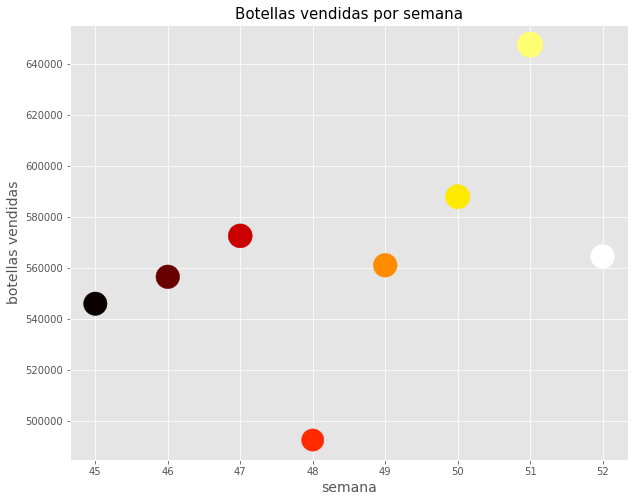

In [28]:
# Gráfico de dispersión
x = df_week['semana']
y = df_week['bottles_sold']
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.title('Botellas vendidas por semana', fontsize=15)
plt.ylabel('botellas vendidas', fontsize=14)
plt.xlabel('semana', fontsize=14)
plt.scatter(x,y, s=y/1000, c=x, cmap='hot')

In [14]:
df_botella = df.groupby('item_description')['sale_usd', 'bottles_sold'].sum().reset_index()
df_botella

<ipython-input-14-277f92decd8d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_botella = df.groupby('item_description')['sale_usd', 'bottles_sold'].sum().reset_index()


,item_description,sale_usd,bottles_sold
0,1800 Coconut,69.57,3.0
1,1800 Reposado,765.27,33.0
2,1800 Silver,1418.94,60.0
3,1800 Silver Tequila w/Replica Shot Glasses,510.18,22.0
4,1800 Ultimate Mango Margarita,30.12,2.0
...,...,...,...
1068,Yukon Jack,764.87,49.0
1069,Yukon Jack Jacapple,194.32,14.0
1070,Zaya Gran Reserva Rum,83.88,4.0
1071,Zaya Gran Reserva Rum w/Ice Ball Tray,20.97,1.0


In [18]:
top_10 = df_botella.nlargest(10, 'sale_usd')
top_10

,item_description,sale_usd,bottles_sold
128,Black Velvet,34841.08,4330.0
421,Fireball Cinnamon Whiskey,34227.81,9541.0
1013,Titos Handmade Vodka,31247.36,2603.0
504,Hennessy VS,28109.86,1712.0
535,Jack Daniels Old #7 Black Label,26598.41,1436.0
209,Captain Morgan Original Spiced,24567.91,2085.0
275,Crown Royal,23563.84,2715.0
278,Crown Royal Regal Apple,20842.30,1417.0
497,Hawkeye Vodka,20347.64,3480.0
423,Fireball Cinnamon Whiskey Mini Dispenser,17595.00,391.0


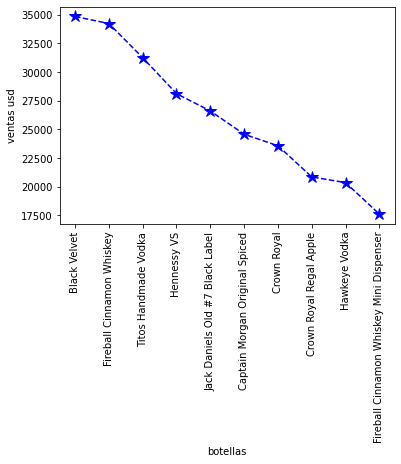

In [22]:
x = top_10['item_description']
y = top_10['sale_usd']

plt.xticks(rotation='vertical')
plt.xlabel('botellas')
plt.ylabel('ventas usd')
plt.plot(x,y, marker='*', markersize=12, linestyle='dashed', color='blue')
plt.savefig('test.jpg')


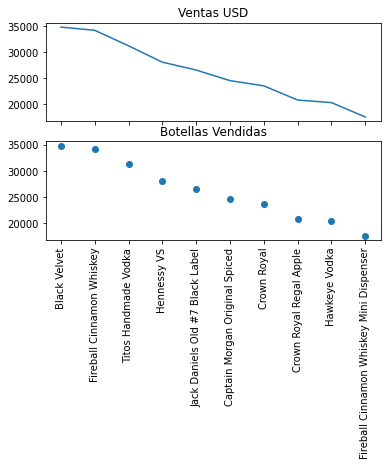

In [23]:
# subplots lienzo para mostrar varios graficos
fig, axs = plt.subplots(2)
axs[0].title.set_text('Ventas USD')
axs[0].set_xticklabels([])
axs[0].plot(x, y)
y_botellas = top_10['bottles_sold']
plt.xticks(rotation='vertical')
axs[1].title.set_text('Botellas Vendidas')
axs[1].scatter(x, y)

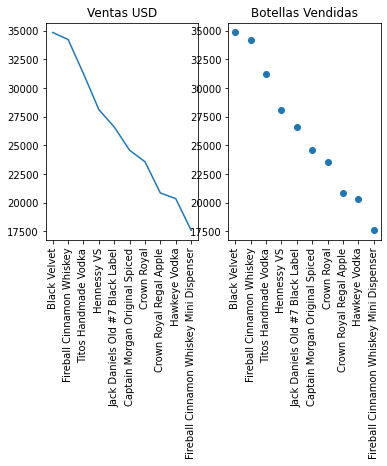

In [24]:
fig, axs = plt.subplots(1, 2)
axs[0].title.set_text('Ventas USD')
axs[0].plot(x, y)
y_botellas = top_10['bottles_sold']
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=90) 
plt.xticks(rotation='vertical')
axs[1].title.set_text('Botellas Vendidas')
axs[1].scatter(x, y)
plt.show()


# grafica de pie

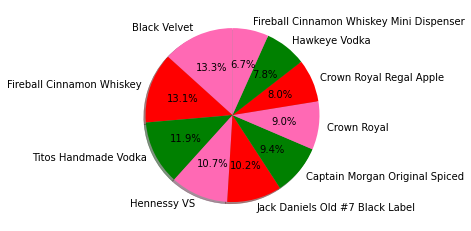

In [25]:
plt.style.use('ggplot')
colors = ['hotpink','red','green']
explode =(.1,0,0,0,0,.1,0,0,0)
plt.pie(y, labels=x, autopct='%1.1f%%', colors=colors, startangle=90,  shadow=True)
plt.show()

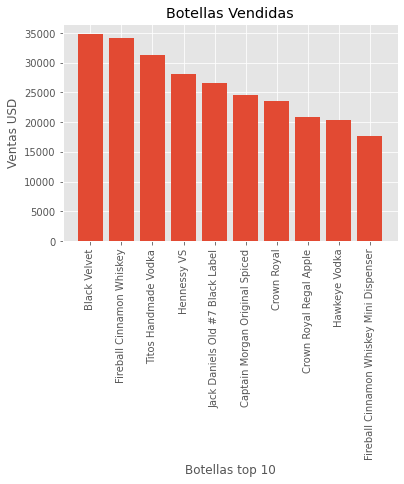

In [26]:
# BarChart
plt.xticks(rotation='vertical')
plt.xlabel('Botellas top 10')
plt.ylabel('Ventas USD')
plt.title('Botellas Vendidas')
plt.bar(x, y)
plt.show()

# Seaborn

In [27]:
import seaborn as sns

In [28]:
x_pack = df['pack']
y_precio_retail = df['state_bottle_retail']


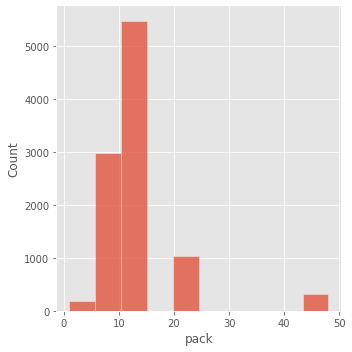

In [29]:
# Displot
sns.displot(x_pack, bins=10)

C:\Users\lgutierrez\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


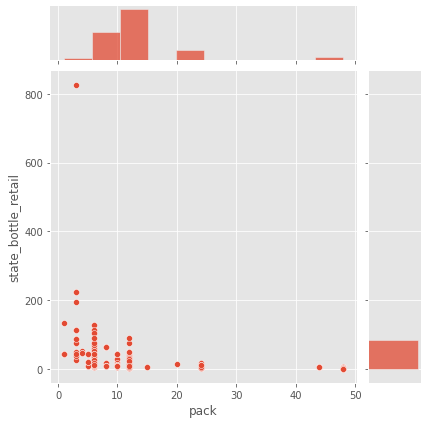

In [32]:
sns.jointplot(x_pack,y_precio_retail, marginal_kws=dict(bins=10))

In [33]:
df_corr = df[['bottle_volume','bottles_sold','sale_usd','pack']].corr()
df_corr

,bottle_volume,bottles_sold,sale_usd,pack
bottle_volume,1.000000,-0.032668,0.028226,0.034267
bottles_sold,-0.032668,1.000000,0.240940,0.278044
sale_usd,0.028226,0.240940,1.000000,-0.068842
pack,0.034267,0.278044,-0.068842,1.000000


<AxesSubplot:>

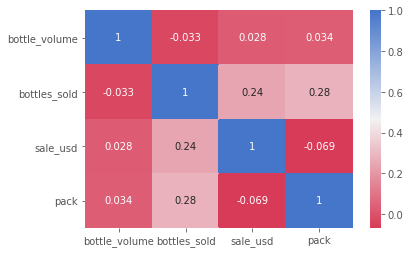

In [34]:
cmap = sns.diverging_palette(6,255, as_cmap=True)
sns.heatmap(df_corr, cmap=cmap, annot=True)

C:\Users\lgutierrez\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pack', ylabel='state_bottle_retail'>

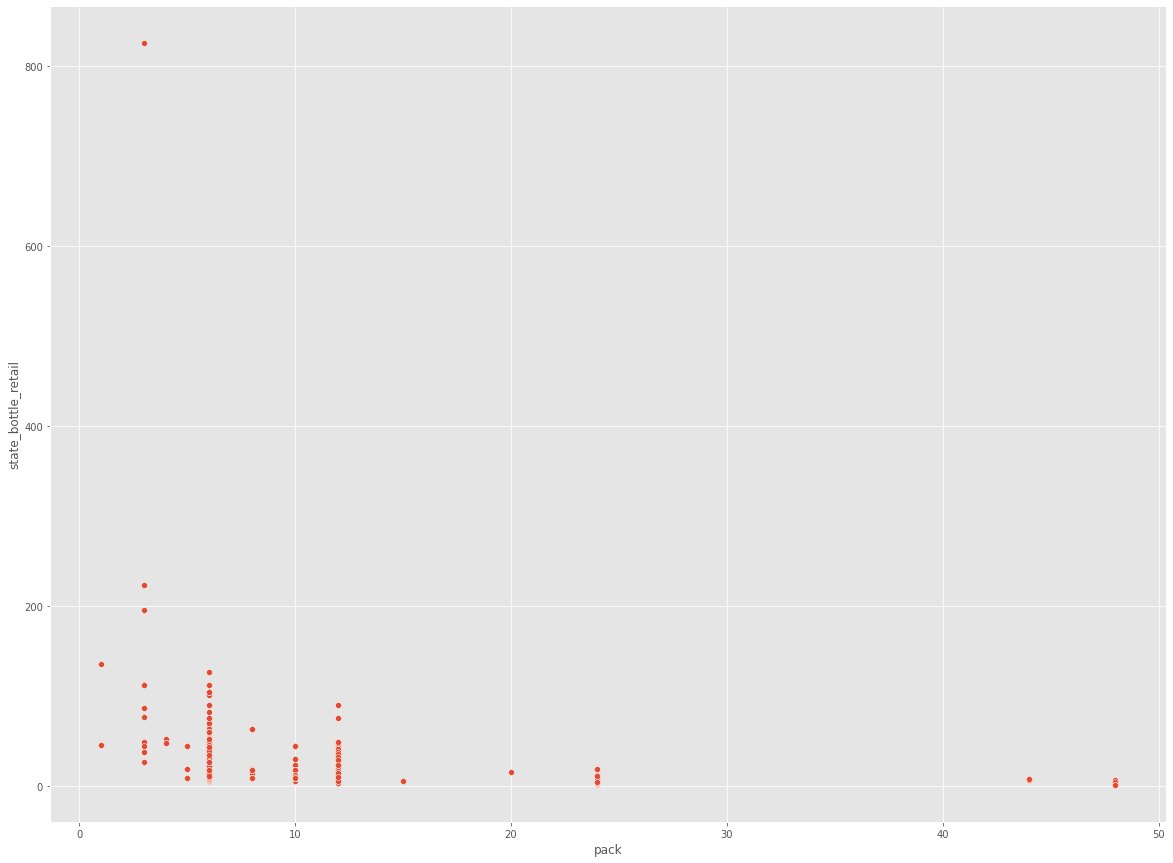

In [35]:
plt.figure(figsize=(20,15))
sns.scatterplot(x_pack,y_precio_retail)

C:\Users\lgutierrez\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pack', ylabel='state_bottle_retail'>

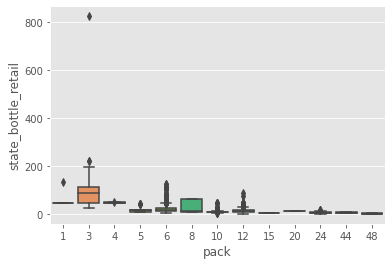

In [36]:
sns.boxplot(x_pack,y_precio_retail)

In [37]:
# Face
df_pack = df.groupby('pack')['sale_usd'].sum().reset_index()
top_pack = df_pack.nlargest(5,'sale_usd')
top_pack['clase'] = 'top_5'
top_pack.head(10)


,pack,sale_usd,clase
7,12,592328.70,top_5
4,6,307459.11,top_5
10,24,87710.87,top_5
12,48,28124.66,top_5
0,1,17775.00,top_5


In [38]:
df.head(2)

,invoice_id,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_usd,volume_sold_lt,volume_sold_gallons,date_mes,date_mes_truncate,semana
0,INV-22970800091,2019-11-01,2569,Hy-Vee Food Store #2 / Cedar Rapids,279 Collins Road NE,Cedar Rapids,52402,POINT (-91.630677 42.027805),57,LINN,...,1.75,16.99,25.49,1.0,25.49,1.75,0.46,11,2019-11-01,44
1,INV-22958000044,2019-11-01,2603,Hy-Vee Wine and Spirits / Bettendorf,2890 Devils Glen Road,Bettendorf,52722,POINT (-90.483701 41.552338),82,SCOTT,...,1.75,7.84,11.76,6.0,70.56,10.50,2.77,11,2019-11-01,44


In [39]:
table_concat = df.merge(top_pack[['pack','clase']],on=['pack'],how='left')
df_top = table_concat[table_concat['clase']=='top_5']

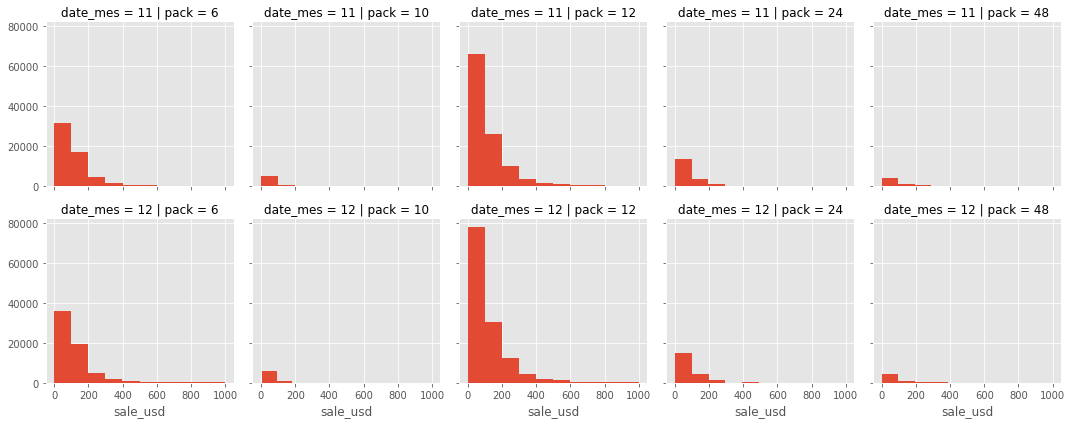

In [55]:
multiple_lienzo = sns.FacetGrid(df_top,col='pack',row='date_mes')
multiple_lienzo.map(plt.hist,'sale_usd')